# Binance API Test   
This notebook will be used to learn and test features of Binance API.

In [ ]:
!pip uninstall pandas 

Found existing installation: pandas 1.5.2
Uninstalling pandas-1.5.2:
  Would remove:
    /media/eliel/EPGM/1_Projetos/6_CriptoBot/2_Python/CripytoBot/CripytoBot_venv/lib/python3.8/site-packages/pandas-1.5.2.dist-info/*
    /media/eliel/EPGM/1_Projetos/6_CriptoBot/2_Python/CripytoBot/CripytoBot_venv/lib/python3.8/site-packages/pandas/*
Proceed (y/n)? 

In [3]:
import requests
import json
import time
import asyncio
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from datetime import datetime
from binance.client import Client
from azure.cosmos.aio import CosmosClient as cosmos_client
from azure.cosmos import PartitionKey, exceptions

ModuleNotFoundError: No module named 'pandas'

In [42]:
# Planejamento dos próximos passos.

# 1. Altrar o método de pegar os dados com a API da Bainance (DONE)
# 2. Finalizar o script de gravação dos dados.
#     Implementar função para verificar se o Database existe (DONE)
#     Implementar função para verificar se o container existe (DONE)
#     Implementar busca de dados na binance maximizando o numero de dados trazidos
    
#     Na inicialização
    
#         Se o database existe e o container existe e o container estiver vazio:
#             Pegar gravar todos so dados da resposta da API da Bianace

#         Se o database existe e o container existe e o container não está vazio:
#             Buscar o último dado salvo e rodar buscar os dados na API da Binance con uma data que sobreponha em alguns 
#             dados os dados salvos.

#     Se não for inicialização

#         Gravar somente os dados da última posição do json de resposta da API da Binance.
     


### Creating a BinanceAPI cliente

In [25]:
api_key = "zVt6HyoDNTzvcuWLtCbznlMLasqOlaKblse87WnohfJ2BIFM6G6N4AmzJ5zznS3T"
api_secret = "NE3odMQHEVxBvOj8Wsiul33gp0lXTV7DKsF8eXTGLW0yHBK2Yl5xt8h4OQ7sPkgm"

client = Client( api_key, api_secret, testnet = True )

In [26]:
# get the status of the server
status = client.get_system_status()
print( status )


{'status': 0, 'msg': 'normal'}


In [50]:
# list of OHLCV values (Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, Number of trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore)

pair = "BTCUSDT"
api_interval = "2h"
limit = 1000
startTime = "1 Dec, 2022"
endTime = "2 Dec, 2022"

status = client.get_system_status()
klines = client.get_historical_klines(pair, api_interval)
# klines = client.get_historical_klines( pair, api_interval, limit, startTime, endTime )

if len( klines ) > 0:
    print( f"{len( klines )} candles found!" )
    print( f"Open for first candle {datetime.fromtimestamp( klines[ 0 ][ 0]/1000 )}" )
    print( f"Open for first candle {datetime.fromtimestamp( klines[ 0 ][ 6]/1000 )}" )

    print( f"Open for last candle {datetime.fromtimestamp( klines[ len( klines ) - 1 ][ 0]/1000 )}" )
    print( f"Open for last candle {datetime.fromtimestamp( klines[ len( klines ) - 1 ][ 6]/1000 )}" )
else:
    print( " No data ")




432 candles found!
Open for first candle 2022-11-02 09:00:00
Open for first candle 2022-11-02 10:59:59.999000
Open for last candle 2022-12-08 07:00:00
Open for last candle 2022-12-08 08:59:59.999000


0     2022-11-16 12:30:00
1     2022-11-16 13:00:00
2     2022-11-16 13:30:00
3     2022-11-16 14:00:00
4     2022-11-16 14:30:00
              ...        
995   2022-12-07 06:00:00
996   2022-12-07 06:30:00
997   2022-12-07 07:00:00
998   2022-12-07 07:30:00
999   2022-12-07 08:00:00
Name: close_time, Length: 1000, dtype: datetime64[ns]


<AxesSubplot:>

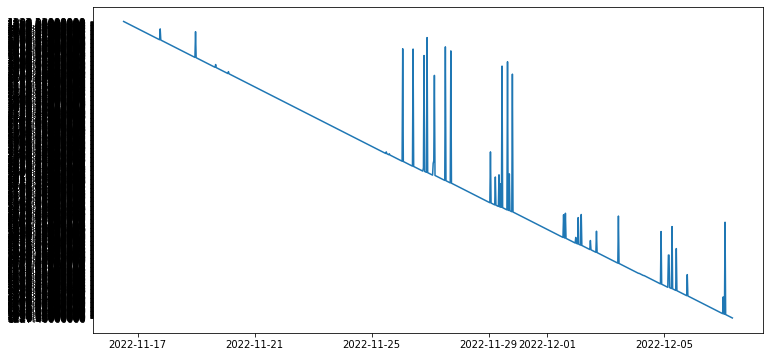

In [8]:
close_price = []
close_time = []
for candle in klines:
    close_price.append( candle[4] )
#     close_time.append( datetime.fromtimestamp( candle[6]/1000 ) )
    close_time.append( datetime.fromtimestamp( np.round( candle[6]/1000, 0 ) ) )
    
df = pd.DataFrame( {"close_time":close_time, "close_price":close_price} )
print( df[ "close_time" ] )


plt.figure( figsize = (12,6) )
sns.lineplot( x = close_time, y = close_price, data = df )

In [9]:
prices = client.get_all_tickers()
print( prices )

[{'symbol': 'BNBBUSD', 'price': '283.40000000'}, {'symbol': 'BTCBUSD', 'price': '16808.52000000'}, {'symbol': 'ETHBUSD', 'price': '1227.84000000'}, {'symbol': 'LTCBUSD', 'price': '76.54000000'}, {'symbol': 'TRXBUSD', 'price': '0.05291000'}, {'symbol': 'XRPBUSD', 'price': '0.37850000'}, {'symbol': 'BNBUSDT', 'price': '283.40000000'}, {'symbol': 'BTCUSDT', 'price': '16808.49000000'}, {'symbol': 'ETHUSDT', 'price': '1227.74000000'}, {'symbol': 'LTCUSDT', 'price': '76.56000000'}, {'symbol': 'TRXUSDT', 'price': '0.05290000'}, {'symbol': 'XRPUSDT', 'price': '0.37850000'}, {'symbol': 'BNBBTC', 'price': '0.01686200'}, {'symbol': 'ETHBTC', 'price': '0.07304700'}, {'symbol': 'LTCBTC', 'price': '0.00455500'}, {'symbol': 'TRXBTC', 'price': '0.00000315'}, {'symbol': 'XRPBTC', 'price': '0.00002252'}, {'symbol': 'LTCBNB', 'price': '0.27040000'}, {'symbol': 'TRXBNB', 'price': '0.00018670'}, {'symbol': 'XRPBNB', 'price': '0.00134000'}]


### Cosmos Class

In [ ]:
# COSMOS 
class CosmosSave():

    # Account uri_and_key
    endpoint = "https://webapp-cosmos.documents.azure.com:443/"
    key = "p9Aouo7wUgqh0Jb6OihmQkwiGxAjddqRJCvU9pfDd2btJySzdrJHTUHAQGa6WPipLCTooNMbqq27l8P5Ix2ISQ=="

    # Define_database_and_container_name
    database_name = 'WebAppDB'
    container_name = 'cripytosdatabase'

    # Get_database
    @classmethod
    async def get_db( cls, client, database_name ):
        try:
            database_obj = client.get_database_client( database_name )
            await database_obj.read()
            return database_obj
            
        except exceptions.CosmosResourceNotFoundError:
            print( f"O Database {database_name} nao existe.")
            print( f"Criando o database {database_name}" )
            return await CosmosSave.create_db( client, database_name )
        
    # Create_database_if_not_exists
    @classmethod
    async def create_db( cls, client, database_name ):
        try:
            return await client.create_database( database_name )
            
        except exceptions.CosmosResourceNotFoundError:
            response = str( await CosmosSave.get_db( client, database_name) )
            print( f"Erro ao criar o databar {database_name}. Uma nova tenativa sera feita em 10 segundos")
            while database_name not in response:
                time.sleep( 10 )
                CosmosSave.create_db( client, database_name )
                response = str( await CosmosSave.get_db( client, database_name) )
            return  

    # Geta container
    @classmethod
    async def get_container( cls, database_obj, container_name ):

        try:        
            items_container = database_obj.get_container_client( container_name )
            await items_container.read()   
            return items_container

        except exceptions.CosmosResourceNotFoundError:
            print( f"O Database {database_name} nao existe.")
            print( f"Criando o database {database_name}" )
            return await CosmosSave.create_container( database_obj, container_name )
            

        except exceptions.CosmosHttpResponseError:
            raise
            
    # Create a container
    # Using a good partition key improves the performance of database operations.
    @classmethod
    async def create_container( cls, database_obj, container_name ):

        try:        
            print( "Creating container with pair as partition key" )
            return await database_obj.create_container(
                id = container_name,
                partition_key = PartitionKey( path = "/pair" ),
                offer_throughput = 900 )

        except exceptions.CosmosResourceNotFoundError:
            response = str( await CosmosSave.get_container( database_obj, container_name ) )
            print( f"Erro ao criar o container {container_name}. Uma nova tenativa sera feita em 10 segundos")
            while container_name not in response:
                time.sleep( 10 )
                CosmosSave.create_container( database_obj, container_name )
                response = str( await CosmosSave.get_db( client, "WebAppDB") )
            return  
        
                           
    # Populate_container_items
    @classmethod
    async def populate_container_items( cls, container_obj, items_to_create ):
            
        # create_item
        for item in items_to_create:
            inserted_item = await container_obj.create_item( body = item )
            print( f"Inserted in cripytodatabase. Item Id: {inserted_item[ 'id' ]}" )


    # Query_items
    @classmethod
    async def query_items( cls, container_obj, query_text ):
        # enable_cross_partition_query should be set to True as the container is partitioned
        # In this case, we do have to await the asynchronous iterator object since logic
        # within the query_items() method makes network calls to verify the partition key
        # definition in the container
        # Query_items
        query_items_response = container_obj.query_items(
            query = query_text,
            enable_cross_partition_query = True
        )
        items = [ item async for item in query_items_response ]
        request_charge = container_obj.client_connection.last_response_headers[ 'x-ms-request-charge' ]
        print( '\nQuery returned {0} items. Operation consumed {1} request units'.format( len(items), request_charge ) )
        return items

     # Save data
    @classmethod
    async def save_data( cls, to_save ):
        #_cosmos_client
        async with cosmos_client( CosmosSave.endpoint, credential = CosmosSave.key ) as client:
        
            try:
                # get the database
                database_obj = await CosmosSave.get_db( client, CosmosSave.database_name )
                # create the container
                container_obj = await CosmosSave.get_container( database_obj, CosmosSave.container_name)
                
                # Save item 
                print( 'Populating the cripyto items in container' )
                await CosmosSave.populate_container_items( container_obj, to_save )  
                             
            except exceptions.CosmosHttpResponseError as e:
                print('\nrun_sample has caught an error. {0}'.format(e.message))
                
    # Get data
    @classmethod
    async def get_data( cls, query_text ):
        # create_cosmos_client
        async with cosmos_client( CosmosSave.endpoint, credential = CosmosSave.key ) as client:
        
            try:
                # get the database
                database_obj = await CosmosSave.get_db( client, CosmosSave.database_name )
                # create the container
                container_obj = await CosmosSave.get_container( database_obj, CosmosSave.container_name)
                               
                response = await CosmosSave.query_items( container_obj, query_text )
                return response 
                             
            except exceptions.CosmosHttpResponseError as e:
                print('\nrun_sample has caught an error. {0}'.format(e.message))

    @classmethod       
    def get_or_create_eventloop( cls ):
        try:
            return asyncio.get_event_loop()
        except RuntimeError as ex:
            if "There is no current event loop in thread" in str(ex):
                loop = asyncio.new_event_loop()
                asyncio.set_event_loop(loop)
                return asyncio.get_event_loop()
    
    @classmethod            
    def run_that( cls, to_save ): 
        loop = CosmosSave.get_or_create_eventloop()
        loop.run_until_complete( CosmosSave.save_data( to_save ) )


### Get Cripyto Data

In [32]:
import requests
from datetime import datetime

class GetCripytosData():
    
    api_key = "zVt6HyoDNTzvcuWLtCbznlMLasqOlaKblse87WnohfJ2BIFM6G6N4AmzJ5zznS3T"
    api_secret = "NE3odMQHEVxBvOj8Wsiul33gp0lXTV7DKsF8eXTGLW0yHBK2Yl5xt8h4OQ7sPkgm"

    client = Client( api_key, api_secret, testnet = True )
    
    def __init__( self, pair, api_interval ):
        self.pair = pair
        self.api_interval = api_interval
        

    def get_candles( self, pair, api_interval ):  
        """
        Documentar
        
        """
                
        now = datetime.now()
        try:

            status = GetCripytosData.client.get_system_status()
            if status[ "status"] == 0:
                print( 'Tempo entre requisicao e resposta na Bincace = {} ms \n'.format( int( (datetime.now() - now ).microseconds / 1000 ) ) )
                response = GetCripytosData.client.get_historical_klines( pair, api_interval )
                return response
            
        except Exception as ex:
            print( f'Error de conexao com o servidor: {ex}')
            print( 'Tentando coletar os dados noavmente em 10 segundos')
            time.sleep( 10 )
            self.get_candles( pair, api_interval )
            
            
    def list_to_cosmos( self, cripytos_data, dict_cripyto ):
        
        list_to_save = []
                         
        if self.pair + self.api_interval in dict_cripyto.keys():
            
            dict_cripyto[ self.pair + self.api_interval ] += 1
            data = cripytos_data[ len( cripytos_data ) - 1 ]
            data.insert( 0, str( datetime.now() ) )
            data.insert( 1, self.pair )
            data.insert( 2, self.api_interval )
            data.insert( 3, dict_cripyto[ self.pair + self.api_interval ] )

            print( f'Building registry = {dict_cripyto[ self.pair + self.api_interval ]} para {self.pair} {self.api_interval}' )

            to_save = {
                    "id": str( data[ 1 ] ) + str( data[ 2 ] ) + "-" +str( data[ 0 ] ),
                    "datetime":data[ 0 ],
                    "pair":data[ 1 ],
                    "interval":data[ 2 ],
                    "registry":data[ 3 ],
                    "Open_time":data[ 4 ],
                    "Open":data[ 5 ],
                    "High":data[ 6 ],
                    "Low":data[ 7 ],
                    "Close":data[ 8 ],
                    "Volume":data[ 9 ],
                    "Close_time":data[ 10 ],
                    "Quote_asset_volume":data[ 11 ],
                    "Number_of_trades":data[ 12 ],
                    "Taker_buy_base_asset_volume":data[ 13 ],
                    "Taker_buy_quote_asset_volume":data[ 14 ],
                    "Ignore":data[ 15 ]                
                }
            list_to_save.append( to_save )
            
        else:
            
            dict_cripyto[ self.pair + self.api_interval  ] = 1
            

            for data in cripytos_data:
                print( f'Building registry = {dict_cripyto[ self.pair + self.api_interval ]} para {self.pair} {self.api_interval}' )
                                               
                data.insert( 0, str( datetime.now() ) )
                data.insert( 1, self.pair )
                data.insert( 2, self.api_interval )
                data.insert( 3, dict_cripyto[ self.pair + self.api_interval ] )
                
                to_save = {
                    "id": str( data[ 1 ] ) + str( data[ 2 ] ) + "-" +str( data[ 0 ] ),
                    "datetime":data[ 0 ],
                    "pair":data[ 1 ],
                    "interval":data[ 2 ],
                    "registry":data[ 3 ],
                    "Open_time":data[ 4 ],
                    "Open":data[ 5 ],
                    "High":data[ 6 ],
                    "Low":data[ 7 ],
                    "Close":data[ 8 ],
                    "Volume":data[ 9 ],
                    "Close_time":data[ 10 ],
                    "Quote_asset_volume":data[ 11 ],
                    "Number_of_trades":data[ 12 ],
                    "Taker_buy_base_asset_volume":data[ 13 ],
                    "Taker_buy_quote_asset_volume":data[ 14 ],
                    "Ignore":data[ 15 ]                
                }
                list_to_save.append( to_save )

                if dict_cripyto[ self.pair + self.api_interval  ] < len( cripytos_data ):
                    dict_cripyto[ self.pair + self.api_interval  ] += 1

        return list_to_save, dict_cripyto

    
    @classmethod
    def is_on_line( cls ):
        try:
            
            requests.head( "http://www.google.com" )
            
            return True

        except requests.ConnectionError:

            return False

### App Teste

#### Funcoes de apoio

In [37]:
def save_to_file( to_save, pair, interval, mode ):

    with open( 'data/' +  str( pair ) + str ( interval ) + '.txt', mode ) as file:
        
        for line in to_save:
            file.write( str( line ).replace( "'", '"' ) + '\n' )
        
        print( f'{len( to_save )} inserted in the to_save.txt')

def overwrite_save_to_file( to_save, pair, interval ):
    save_to_file( to_save , pair, interval , 'w' )

def list_to_save( pair, interval ):
    print( ' lendo arquivo para gravacao: data/' + pair + interval + '.txt' )

    try:
        with open( 'data/' + pair + interval + '.txt', 'r' ) as file:
            save_list = file.read()
            return save_list.split( '\n' )

    except Exception:
        raise

        
def save_to_cosmos( to_save, pair, interval ):

    to_cosmos = []

    if len( to_save ) > 0:
        if len( to_save ) >= 10:
            for _ in range( 10 ):
                if to_save[ 0 ] != '':
                    to_cosmos.append( json.loads( to_save.pop( 0 ) ) )
                else:
                     to_save.pop( 0 )
        else:
            if to_save[ 0 ] != '':
                to_cosmos.append( json.loads( to_save.pop( 0 ) ) )
            else:
                to_save.pop( 0 )
            
    else:
        print( 'No data to save!' )

    try:
        print( f'len to_save after save in comos = { len( to_save ) }' )
        CosmosSave.run_that( to_cosmos )
        overwrite_save_to_file( to_save, pair, interval )


    except ConnectionError as error:
        print( f'Erro de conexao: {error}' )



In [38]:
# Global variables
dict_time = {
                'start_time_1m':datetime.now(),
                'start_time_2h':datetime.now(),
                'start_time_1d':datetime.now(),
                'start_time_1w':datetime.now(),
            }

# times = { '1m': 60, '2h': 7200 , '1d': 24 * 3600, '1w': 7 * 24 * 3600 }
times = { '1m': 60, '2h': 90 , '1d': 120, '1w': 150 }
intervals = { '1m': None, '2h': None, '1d': None, '1w': None }
# intervals = { '1m': 60, '2h': 7200 , '1d': 24 * 3600, '1w': 7 * 24 * 3600 }

usdt_pairs = [ 'BTCUSDT',  'ETHUSDT' ]#,  'XMRUSDT',  'XRPUSDT',   'BUSDUSDT',
#                'DOGEUSDT', 'LTCUSDT',  'ETCUSDT',  'ZECUSDT',   'MANAUSDT' ]


def get_cripyto_data( usdt_pairs, dict_time, times, intervals ):

    to_save = []
    dict_cripyto = {}
#     dict_cripyto = { 
#                     'BTCUSDT1m':1,  'ETHUSDT1m':1,  'XMRUSDT1m':1,  'XRPUSDT1m':1,   'BUSDUSDT1m':1,
#                     'DOGEUSDT1m':1, 'LTCUSDT1m':1,  'ETCUSDT1m':1,  'ZECUSDT1m':1,   'MANAUSDT1m':1, 
#                     'BTCUSDT2h':1,  'ETHUSDT2h':1,  'XMRUSDT2h':1,  'XRPUSDT2h':1,   'BUSDUSDT2h':1,
#                     'DOGEUSDT2h':1, 'LTCUSDT2h':1,  'ETCUSDT2h':1,  'ZECUSDT2h':1,   'MANAUSDT2h':1, 
#                     'BTCUSDT1d':1,  'ETHUSDT1d':1,  'XMRUSDT1d':1,  'XRPUSDT1d':1,   'BUSDUSDT1d':1,
#                     'DOGEUSDT1d':1, 'LTCUSDT1d':1,  'ETCUSDT1d':1,  'ZECUSDT1d':1,   'MANAUSDT1d':1, 
#                     'BTCUSDT1w':1,  'ETHUSDT1w':1,  'XMRUSDT1w':1,  'XRPUSDT1w':1,   'BUSDUSDT1w':1,
#                     'DOGEUSDT1w':1, 'LTCUSDT1w':1,  'ETCUSDT1w':1,  'ZECUSDT1w':1,   'MANAUSDT1w':1 
#                     }

    # Create or get the Databse and Container
    while True:
        
        if GetCripytosData.is_on_line():
            
            for api_interval in intervals.keys():                   

                if intervals[ api_interval ] == None:
                    for pair in usdt_pairs:
                        data = GetCripytosData( pair, api_interval )
                        cripytos_data = data.get_candles( data.pair, data.api_interval )
                        lista_to_cosmos, dict_cripyto =  data.list_to_cosmos( cripytos_data, dict_cripyto )
                        to_save.extend( lista_to_cosmos )

                        save_to_file( to_save, data.pair, data.api_interval, 'a' )
                        to_save.clear()    
                        time.sleep( 10 )

                    
                    intervals[ api_interval ] = times[ api_interval ]

            
                else: 
                    interval = intervals[ api_interval ]
                    if ( datetime.now() - dict_time[ 'start_time_' + api_interval ] ).seconds >= interval:
                        
                        dict_time[ 'start_time_' + api_interval ] = datetime.now()
                        
                        for pair in usdt_pairs:
                         
                            print( f'Getting data for {pair} evrey {interval} seconds' )

                            data = GetCripytosData( pair, api_interval )
                            cripytos_data = data.get_candles( data.pair, data.api_interval )
                            lista_to_cosmos, dict_cripyto =  data.list_to_cosmos( cripytos_data, dict_cripyto )
                            to_save.extend( lista_to_cosmos )
                            print( f'len to_save antes = { len( to_save ) }' )

                            save_to_file( to_save, data.pair, data.api_interval, 'a' )
                            to_save.clear()
                
                    else:
                        files_list = os.listdir( 'data/' )
                        file_name = files_list[ np.random.randint( 0, len( files_list ) ) ]
                        print( f'File send to save: {file_name}')
                        pair = file_name[ : len( file_name ) - 6 ]
                        interval = file_name[ len( file_name ) - 6 : len( file_name ) - 4 ]
                        to_cosmos = list_to_save( pair, interval )
                        print( f'len to_save before save in comos = { len( to_cosmos ) }' )
                        save_to_cosmos( to_cosmos, pair, interval )
                        
        else:

            print( 'No Internet Connection' )
            print( 'Tring to reconnect in 10 seconds' )
            time.sleep( 10 )


In [41]:
get_cripyto_data( usdt_pairs, dict_time, times, intervals )

0
Tempo entre requisicao e resposta na Bincace = 0 ms 

Building registry = 1 para BTCUSDT 1m
Building registry = 2 para BTCUSDT 1m
Building registry = 3 para BTCUSDT 1m
Building registry = 4 para BTCUSDT 1m
Building registry = 5 para BTCUSDT 1m
Building registry = 6 para BTCUSDT 1m
Building registry = 7 para BTCUSDT 1m
Building registry = 8 para BTCUSDT 1m
Building registry = 9 para BTCUSDT 1m
Building registry = 10 para BTCUSDT 1m
Building registry = 11 para BTCUSDT 1m
Building registry = 12 para BTCUSDT 1m
Building registry = 13 para BTCUSDT 1m
Building registry = 14 para BTCUSDT 1m
Building registry = 15 para BTCUSDT 1m
Building registry = 16 para BTCUSDT 1m
Building registry = 17 para BTCUSDT 1m
Building registry = 18 para BTCUSDT 1m
Building registry = 19 para BTCUSDT 1m
Building registry = 20 para BTCUSDT 1m
Building registry = 21 para BTCUSDT 1m
Building registry = 22 para BTCUSDT 1m
Building registry = 23 para BTCUSDT 1m
Building registry = 24 para BTCUSDT 1m
Building registry

0
Tempo entre requisicao e resposta na Bincace = 0 ms 

Building registry = 1 para ETHUSDT 1m
Building registry = 2 para ETHUSDT 1m
Building registry = 3 para ETHUSDT 1m
Building registry = 4 para ETHUSDT 1m
Building registry = 5 para ETHUSDT 1m
Building registry = 6 para ETHUSDT 1m
Building registry = 7 para ETHUSDT 1m
Building registry = 8 para ETHUSDT 1m
Building registry = 9 para ETHUSDT 1m
Building registry = 10 para ETHUSDT 1m
Building registry = 11 para ETHUSDT 1m
Building registry = 12 para ETHUSDT 1m
Building registry = 13 para ETHUSDT 1m
Building registry = 14 para ETHUSDT 1m
Building registry = 15 para ETHUSDT 1m
Building registry = 16 para ETHUSDT 1m
Building registry = 17 para ETHUSDT 1m
Building registry = 18 para ETHUSDT 1m
Building registry = 19 para ETHUSDT 1m
Building registry = 20 para ETHUSDT 1m
Building registry = 21 para ETHUSDT 1m
Building registry = 22 para ETHUSDT 1m
Building registry = 23 para ETHUSDT 1m
Building registry = 24 para ETHUSDT 1m
Building registry

0
Tempo entre requisicao e resposta na Bincace = 0 ms 

Building registry = 1 para BTCUSDT 2h
Building registry = 2 para BTCUSDT 2h
Building registry = 3 para BTCUSDT 2h
Building registry = 4 para BTCUSDT 2h
Building registry = 5 para BTCUSDT 2h
Building registry = 6 para BTCUSDT 2h
Building registry = 7 para BTCUSDT 2h
Building registry = 8 para BTCUSDT 2h
Building registry = 9 para BTCUSDT 2h
Building registry = 10 para BTCUSDT 2h
Building registry = 11 para BTCUSDT 2h
Building registry = 12 para BTCUSDT 2h
Building registry = 13 para BTCUSDT 2h
Building registry = 14 para BTCUSDT 2h
Building registry = 15 para BTCUSDT 2h
Building registry = 16 para BTCUSDT 2h
Building registry = 17 para BTCUSDT 2h
Building registry = 18 para BTCUSDT 2h
Building registry = 19 para BTCUSDT 2h
Building registry = 20 para BTCUSDT 2h
Building registry = 21 para BTCUSDT 2h
Building registry = 22 para BTCUSDT 2h
Building registry = 23 para BTCUSDT 2h
Building registry = 24 para BTCUSDT 2h
Building registry

0
Tempo entre requisicao e resposta na Bincace = 0 ms 

Building registry = 1 para ETHUSDT 2h
Building registry = 2 para ETHUSDT 2h
Building registry = 3 para ETHUSDT 2h
Building registry = 4 para ETHUSDT 2h
Building registry = 5 para ETHUSDT 2h
Building registry = 6 para ETHUSDT 2h
Building registry = 7 para ETHUSDT 2h
Building registry = 8 para ETHUSDT 2h
Building registry = 9 para ETHUSDT 2h
Building registry = 10 para ETHUSDT 2h
Building registry = 11 para ETHUSDT 2h
Building registry = 12 para ETHUSDT 2h
Building registry = 13 para ETHUSDT 2h
Building registry = 14 para ETHUSDT 2h
Building registry = 15 para ETHUSDT 2h
Building registry = 16 para ETHUSDT 2h
Building registry = 17 para ETHUSDT 2h
Building registry = 18 para ETHUSDT 2h
Building registry = 19 para ETHUSDT 2h
Building registry = 20 para ETHUSDT 2h
Building registry = 21 para ETHUSDT 2h
Building registry = 22 para ETHUSDT 2h
Building registry = 23 para ETHUSDT 2h
Building registry = 24 para ETHUSDT 2h
Building registry

0
Tempo entre requisicao e resposta na Bincace = 0 ms 

Building registry = 1 para BTCUSDT 1d
Building registry = 2 para BTCUSDT 1d
Building registry = 3 para BTCUSDT 1d
Building registry = 4 para BTCUSDT 1d
Building registry = 5 para BTCUSDT 1d
Building registry = 6 para BTCUSDT 1d
Building registry = 7 para BTCUSDT 1d
Building registry = 8 para BTCUSDT 1d
Building registry = 9 para BTCUSDT 1d
Building registry = 10 para BTCUSDT 1d
Building registry = 11 para BTCUSDT 1d
Building registry = 12 para BTCUSDT 1d
Building registry = 13 para BTCUSDT 1d
Building registry = 14 para BTCUSDT 1d
Building registry = 15 para BTCUSDT 1d
Building registry = 16 para BTCUSDT 1d
Building registry = 17 para BTCUSDT 1d
Building registry = 18 para BTCUSDT 1d
Building registry = 19 para BTCUSDT 1d
Building registry = 20 para BTCUSDT 1d
Building registry = 21 para BTCUSDT 1d
Building registry = 22 para BTCUSDT 1d
Building registry = 23 para BTCUSDT 1d
Building registry = 24 para BTCUSDT 1d
Building registry

KeyboardInterrupt: 